In [15]:
# ===============================================================
# STEP 1: INSTALL REQUIRED PACKAGES
# ===============================================================
# Install all required R packages for mixed models, plotting, post-hoc tests, etc.
install.packages(c(
  "lme4", "lmerTest", "emmeans", "ggplot2", "performance", "mediation",
  "MuMIn", "rstatix", "tidyverse", "car", "broom", "gridExtra",
  "PairedData", "interactions", "visreg", "readxl", "nlme",
  "caTools", "ggpubr", "multcomp", "effsize"
))

# ===============================================================
# STEP 2: LOAD LIBRARIES
# ===============================================================
# Load libraries into current R session
library(nlme); library(car); library(lme4); library(lmerTest)
library(emmeans); library(ggplot2); library(performance); library(mediation)
library(MuMIn); library(rstatix); library(tidyverse); library(broom)
library(gridExtra); library(PairedData); library(interactions); library(visreg)
library(readxl); library(caTools); library(ggpubr); library(multcomp); library(effsize)

# Clean up environment and free memory
gc(); rm(list = ls())

# ===============================================================
# STEP 3: CLONE DATA FROM GITHUB (replace with your repo as needed)
# ===============================================================
# Download full dataset from GitHub repository (public sharing)
system("git clone https://github.com/CunninghamLab/Publication-Data.git")
setwd("Publication-Data/2. Jin Yuk et al 2025 RNN/Processed Data")
list.files()

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,3297450,176.2,6156624,328.8,6156624,328.8
Vcells,5843570,44.6,12255594,93.6,12255456,93.6


[1] "R_Data_1_CCvsUEFM.csv"        "R_Data_2_LtoH_Transition.csv"
[3] "R_Data_3_CF.csv"              "R_Data_4_ICI.csv"            
[5] "R_Data_5_ICIvsCF.csv"         "R_Data_6_BI_CF_ICI.csv"

N= 12 
 [1] A002 A004 A005 A007 A014 A015 A016 A017 A025 A055 A067 A073
Levels: A002 A004 A005 A007 A014 A015 A016 A017 A025 A055 A067 A073
  Lag0_High_mean Lag0_High_sd Lag0_High_min Lag0_High_max
1      0.3157923    0.2181862  -0.006920415      0.623222



	Shapiro-Wilk normality test

data:  resid(model)
W = 0.93976, p-value = 0.4949


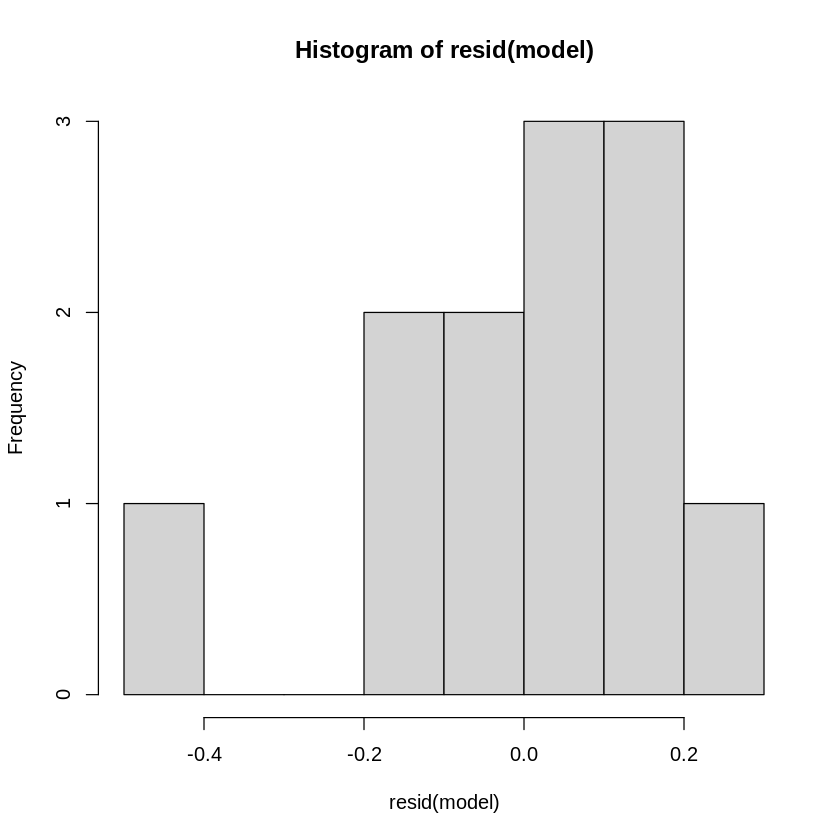

Analysis of Variance Table

Response: Lag0_High
          Df  Sum Sq  Mean Sq F value Pr(>F)  
UEFM       1 0.13411 0.134114  3.4429 0.0932 .
Residuals 10 0.38954 0.038954                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


`geom_smooth()` using formula = 'y ~ x'


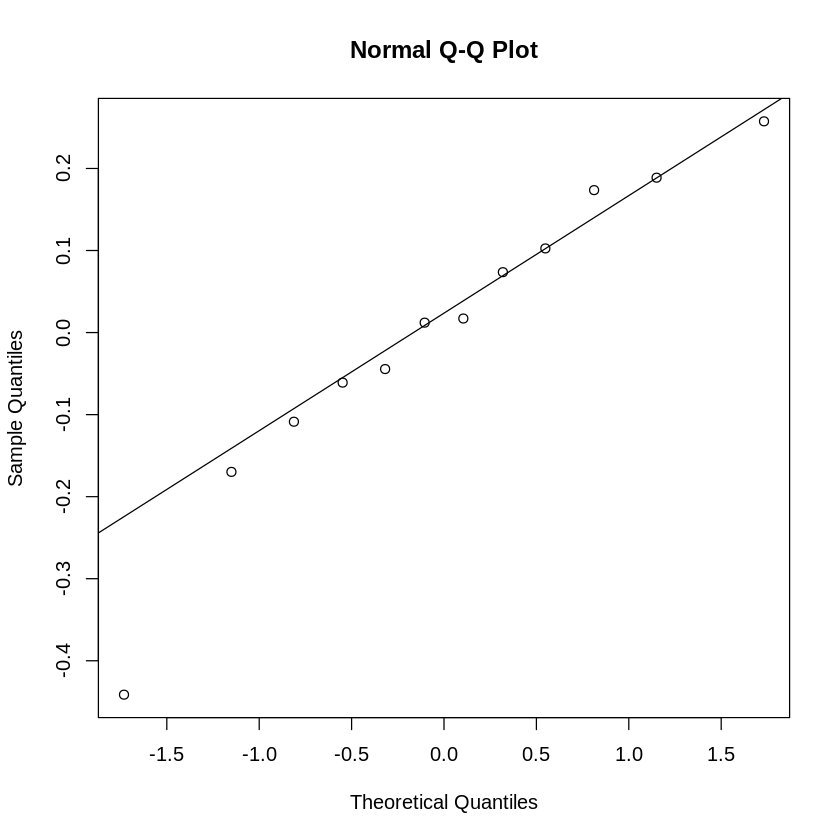

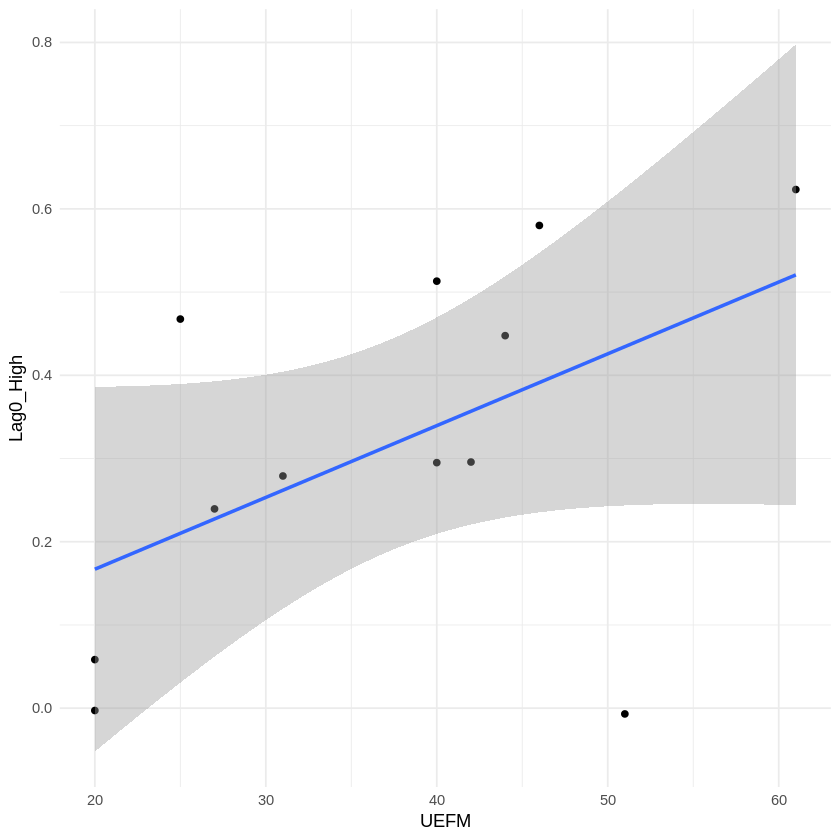

In [16]:
# ===============================================================
# PART 1: CORRELATION: UEFM vs Lag0_High
# ===============================================================

# Load main dataset for Part 1
data_1 <- read.csv("R_Data_1_CCvsUEFM.csv")

# Filter out excluded subject and clean categorical variables
group_a <- data_1 %>%
  filter(!SubID %in% c("A074")) %>%
  filter(!is.na(PHLevel), PHLevel != "NA") %>%
  mutate(SubID=factor(SubID), Group=factor(Group), PHLevel=factor(PHLevel))

# Display subject count
included_subjects <- unique(group_a$SubID)
cat("N=", length(included_subjects), "\n"); print(included_subjects)

# Compute descriptive stats
print(group_a %>%
        summarise(across(Lag0_High, list(mean=mean, sd=sd, min=min, max=max), na.rm=TRUE)))

# Fit simple linear regression
model <- lm(Lag0_High ~ UEFM, data=group_a)

# Residual diagnostics
shapiro.test(resid(model))
hist(resid(model))
qqnorm(resid(model)); qqline(resid(model))
print(anova(model))

# Plot scatterplot + regression line
print(ggplot(group_a, aes(UEFM, Lag0_High)) + geom_point() + geom_smooth(method="lm") + theme_minimal())

N= 11 
 [1] A002 A004 A007 A014 A015 A016 A017 A025 A055 A067 A073
Levels: A002 A004 A007 A014 A015 A016 A017 A025 A055 A067 A073
  Lag0_High_mean Lag0_High_sd Lag0_High_min Lag0_High_max
1      0.3451298     0.202496  -0.002816819      0.623222



	Shapiro-Wilk normality test

data:  resid(model)
W = 0.92157, p-value = 0.3319


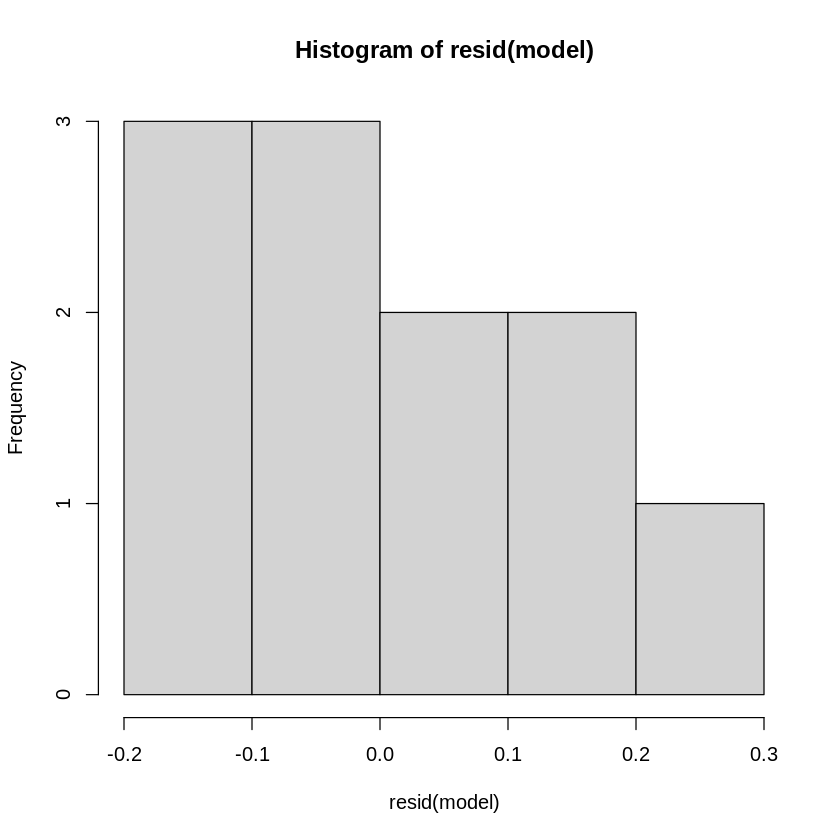

Analysis of Variance Table

Response: Lag0_High
          Df  Sum Sq  Mean Sq F value   Pr(>F)   
UEFM       1 0.26044 0.260436  15.667 0.003314 **
Residuals  9 0.14961 0.016623                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call:
lm(formula = Lag0_High ~ UEFM, data = group_a)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.143559 -0.091793 -0.002248  0.058245  0.262959 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.114741   0.122515  -0.937  0.37344   
UEFM         0.012774   0.003227   3.958  0.00331 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1289 on 9 degrees of freedom
Multiple R-squared:  0.6351,	Adjusted R-squared:  0.5946 
F-statistic: 15.67 on 1 and 9 DF,  p-value: 0.003314



`geom_smooth()` using formula = 'y ~ x'


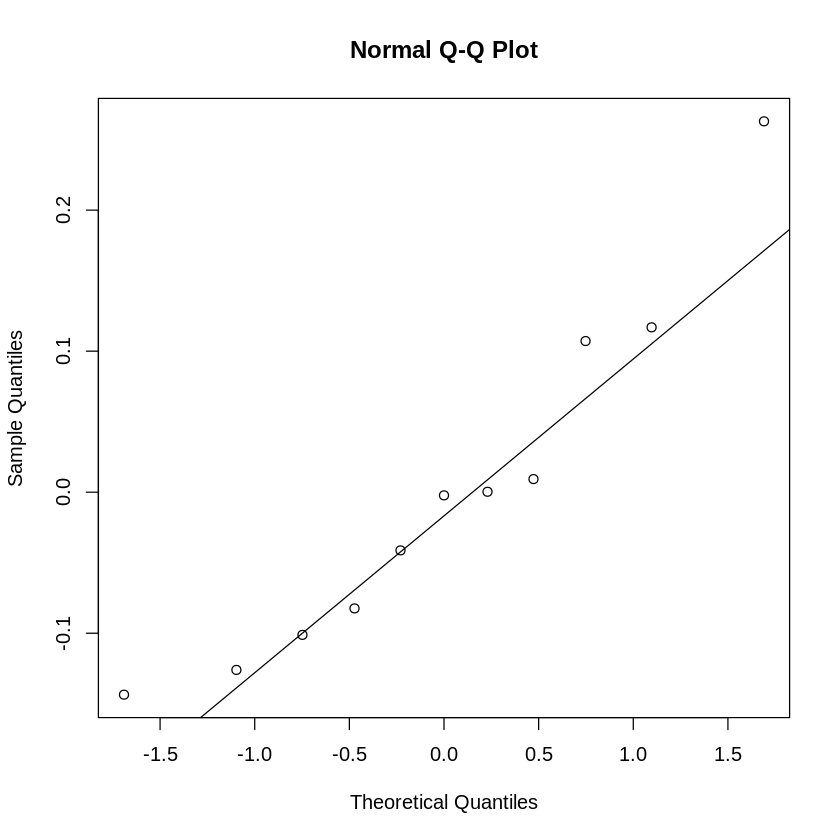

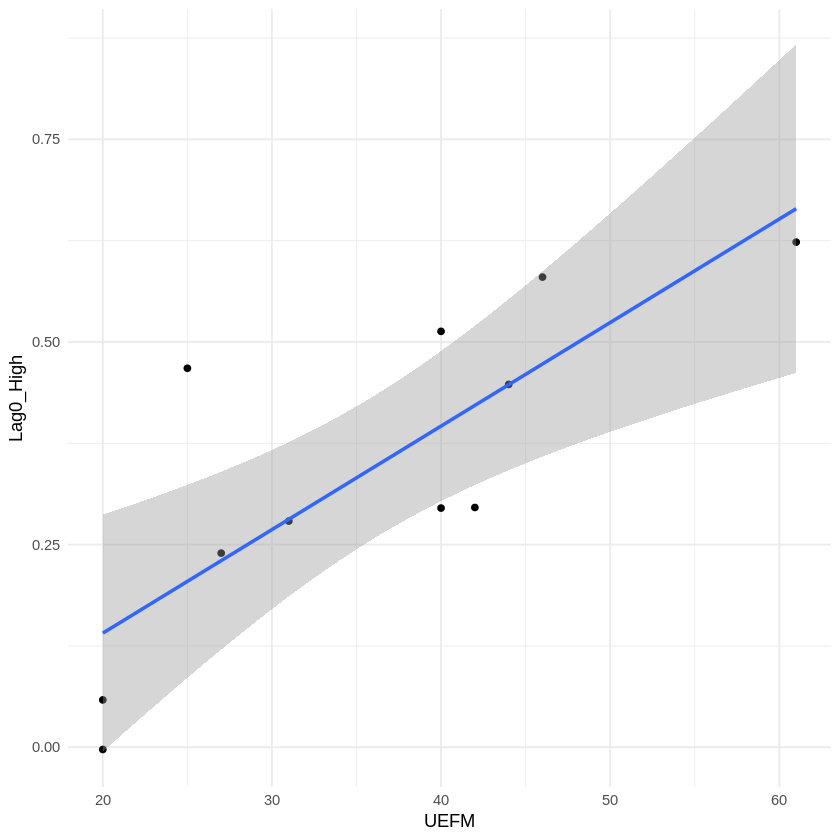

In [17]:
# ===============================================================
# PART 2: CORRELATION WITH OUTLIER REMOVED
# ===============================================================

# Reload and exclude outlier (A005)
data_1 <- read.csv("R_Data_1_CCvsUEFM.csv")
group_a <- data_1 %>%
  filter(!SubID %in% c("A074", "A005")) %>%
  filter(Group == "A") %>%
  filter(!is.na(PHLevel), PHLevel != "NA") %>%
  mutate(SubID=factor(SubID), Group=factor(Group), PHLevel=factor(PHLevel))

included_subjects <- unique(group_a$SubID)
cat("N=", length(included_subjects), "\n"); print(included_subjects)

# Summary after outlier removal
print(group_a %>%
        summarise(across(Lag0_High, list(mean=mean, sd=sd, min=min, max=max), na.rm=TRUE)))

# Re-fit model
model <- lm(Lag0_High ~ UEFM, data=group_a)
shapiro.test(resid(model))
hist(resid(model))
qqnorm(resid(model)); qqline(resid(model))
print(anova(model)); print(summary(model))
print(ggplot(group_a, aes(UEFM, Lag0_High)) + geom_point() + geom_smooth(method="lm") + theme_minimal())

N= 13 
 [1] A002 A004 A005 A007 A014 A015 A016 A017 A025 A055 A067 A073 A074
Levels: A002 A004 A005 A007 A014 A015 A016 A017 A025 A055 A067 A073 A074



	Shapiro-Wilk normality test

data:  resid(model)
W = 0.97972, p-value = 0.7358


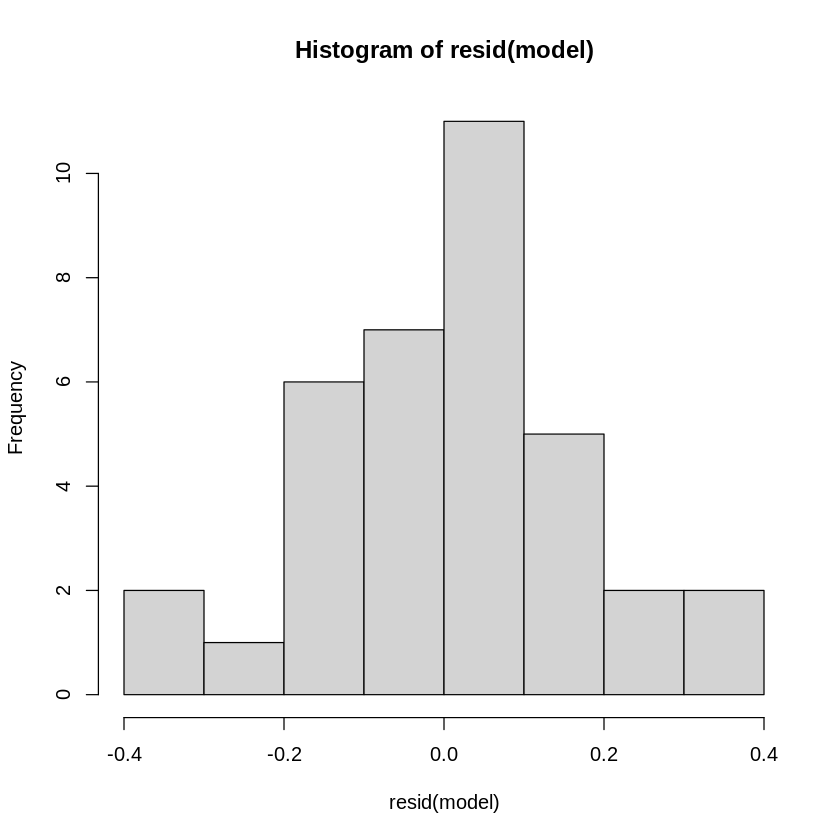

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF DenDF F value    Pr(>F)    
Condition 1.3441 0.67206     2    22 16.7509 3.796e-05 ***
UEFM      0.0351 0.03510     1    10  0.8749    0.3716    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
 contrast      estimate     SE df t.ratio p.value
 10_30 - 30_70   -0.326 0.0818 22  -3.986  0.0017
 10_30 - 10_70   -0.460 0.0818 22  -5.627  <.0001
 30_70 - 10_70   -0.134 0.0818 22  -1.641  0.2501

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 3 estimates 


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


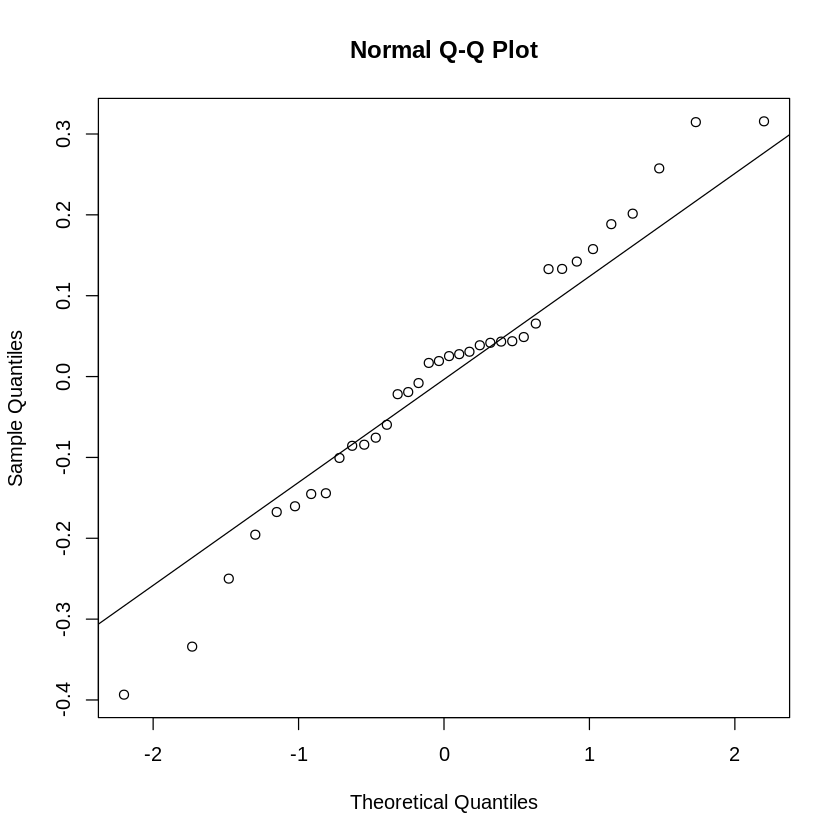

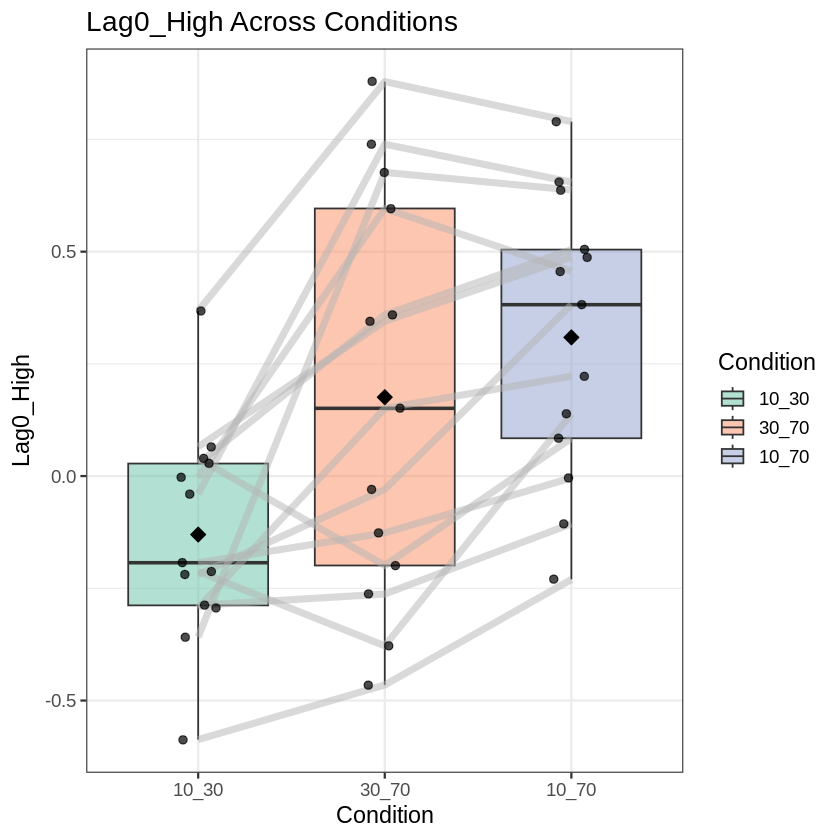

In [ ]:
# ===============================================================
# PART 3: DYNAMIC-ISOMETRIC TASK (MIXED MODEL)
# ===============================================================

# Load dynamic-isometric task data
data_dyn <- read.csv("R_Data_2_LtoH_Transition.csv") %>%
  filter(!is.na(Condition), Condition %in% c("10_30", "30_70", "10_70")) %>%
  mutate(SubID=factor(SubID), Condition=factor(Condition, levels=c("10_30","30_70","10_70")))

included_subjects <- unique(data_dyn$SubID)
cat("N=", length(included_subjects), "\n"); print(included_subjects)

# Fit mixed model with Condition and UEFM
model <- lmer(Lag0_High ~ Condition + UEFM + (1|SubID), data=data_dyn)
shapiro.test(resid(model))
hist(resid(model))
qqnorm(resid(model)); qqline(resid(model))
print(anova(model))

# Post-hoc comparisons
emm <- emmeans(model, ~ Condition)
print(summary(contrast(emm, method="pairwise", adjust="Tukey")))

# Visualization
p_dyn <- ggplot(data_dyn, aes(x = Condition, y = Lag0_High)) +
  geom_boxplot(aes(fill = Condition), alpha = 0.5, outlier.shape = NA) +
  geom_line(aes(group = SubID), color = "gray70", alpha = .5 , size = 2) +  # connecting lines
  geom_point(position = position_jitter(width = 0.1), size = 2, alpha = 0.7) +
  geom_point(stat = "summary", fun = mean, shape = 23, size = 3, fill = "black") +
  scale_fill_brewer(palette = "Set2") +
  theme_bw(base_size = 14) +
  labs(title = "Lag0_High Across Conditions", y = "Lag0_High", x = "Condition")

print(p_dyn)

N= 11 
 [1] A002 A004 A005 A007 A014 A015 A017 A025 A055 A067 A074
Levels: A002 A004 A005 A007 A014 A015 A017 A025 A055 A067 A074


boundary (singular) fit: see help('isSingular')




	Shapiro-Wilk normality test

data:  resid(model)
W = 0.98307, p-value = 0.3147


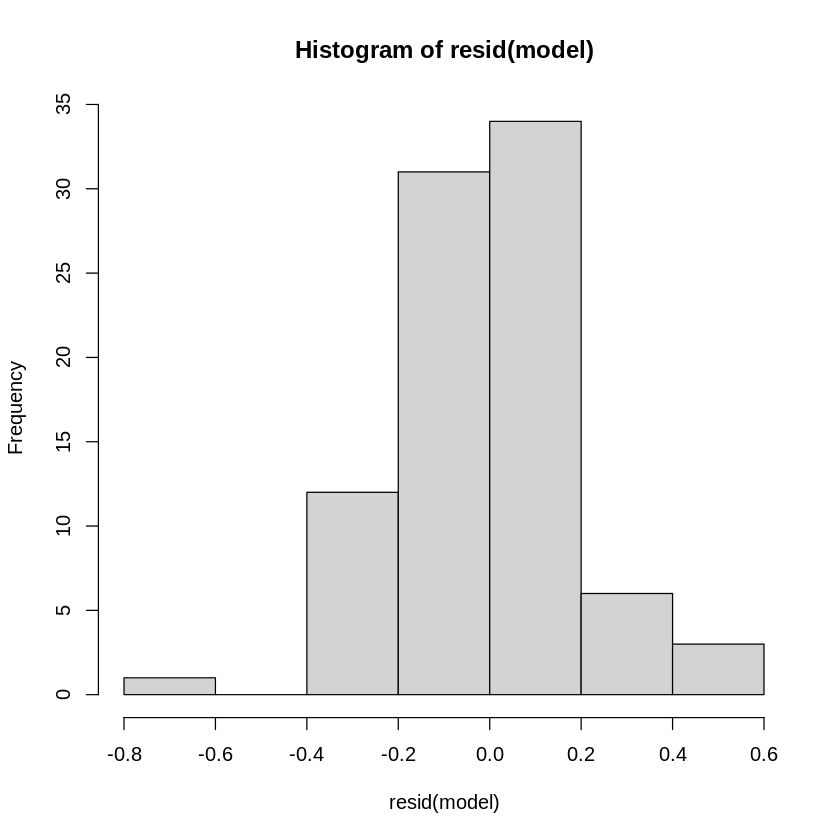

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF DenDF F value    Pr(>F)    
NPHLevel         1.98065 0.99032     2    77 24.9580 4.411e-09 ***
PHLevel          1.69671 0.84836     2    77 21.3801 4.120e-08 ***
UEFM             0.64066 0.64066     1    77 16.1457 0.0001355 ***
NPHLevel:PHLevel 0.56429 0.14107     4    77  3.5553 0.0102670 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: MEPRatio_transformed ~ NPHLevel * PHLevel + UEFM + (1 | SubID)
   Data: data

REML criterion at convergence: 0

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.11520 -0.60851 -0.03369  0.57251  2.57554 

Random effects:
 Groups   Name        Variance Std.Dev.
 SubID    (Intercept) 0.00000  0.0000  
 Residual             0.03968  0.1992  
Number of obs: 87, groups:  SubID, 10

Fixed effects:
                         

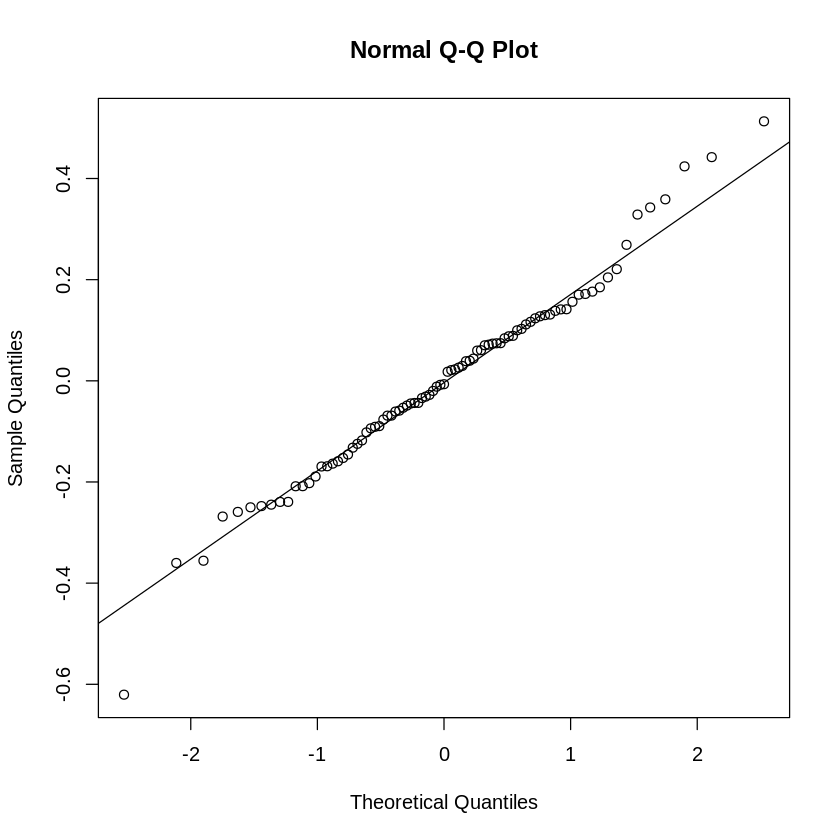

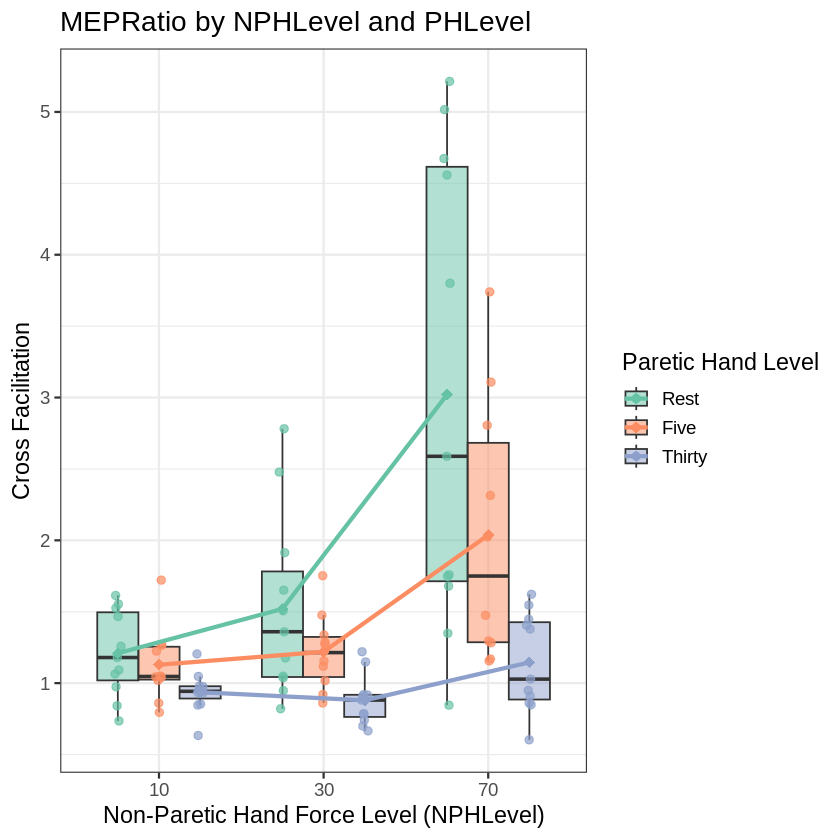

In [23]:
# ===============================================================
# PART 4: CROSS FACILITATION (MEP RATIO)
# ===============================================================

# Load CF data
data <- read.csv("R_Data_3_CF.csv") %>%
  filter(!SubID %in% c("A016","A073")) %>%
  filter(!Condition %in% c("Condition","R_R","5_R","30_R")) %>%
  mutate(SubID=factor(SubID),
         PHLevel=factor(PHLevel, levels=c("Rest","Five","Thirty")),
         NPHLevel=factor(NPHLevel,levels=c("10","30","70")))


included_subjects <- unique(data$SubID)
cat("N=", length(included_subjects), "\n"); print(included_subjects)

# Apply log transform to MEPRatio
data$MEPRatio_transformed <- log(data$MEPRatio+1)

# Mixed model with interaction
model <- lmer(MEPRatio_transformed ~ NPHLevel * PHLevel + UEFM + (1|SubID), data=data)
shapiro.test(resid(model))
hist(resid(model))
qqnorm(resid(model)); qqline(resid(model))
print(anova(model)); print(summary(model))

# Visualization
p_cf <- ggplot(data, aes(x = NPHLevel, y = MEPRatio, fill = PHLevel)) +
  geom_boxplot(position = position_dodge(width = 0.75), alpha = 0.5, outlier.shape = NA) +
  geom_point(
    aes(color = PHLevel),
    position = position_jitterdodge(jitter.width = 0.1, dodge.width = 0.75),
    size = 2,
    alpha = 0.7
  ) +
  stat_summary(
    aes(group = PHLevel, color = PHLevel),
    fun = mean,
    geom = "line",
    position = position_dodge(width = 0.75),
    size = 1.2
  ) +
  stat_summary(
    aes(group = PHLevel, color = PHLevel),
    fun = mean,
    geom = "point",
    position = position_dodge(width = 0.75),
    size = 3,
    shape = 18
  ) +
  scale_fill_brewer(palette = "Set2") +
  scale_color_brewer(palette = "Set2") +
  theme_bw(base_size = 14) +
  labs(
    title = "MEPRatio by NPHLevel and PHLevel",
    x = "Non-Paretic Hand Force Level (NPHLevel)",
    y = "Cross Facilitation",
    fill = "Paretic Hand Level",
    color = "Paretic Hand Level"
  )

print(p_cf)

N= 9 
[1] A002 A004 A005 A007 A014 A015 A025 A055 A067
Levels: A002 A004 A005 A007 A014 A015 A025 A055 A067


boundary (singular) fit: see help('isSingular')




	Shapiro-Wilk normality test

data:  resid(model)
W = 0.93371, p-value = 0.08528


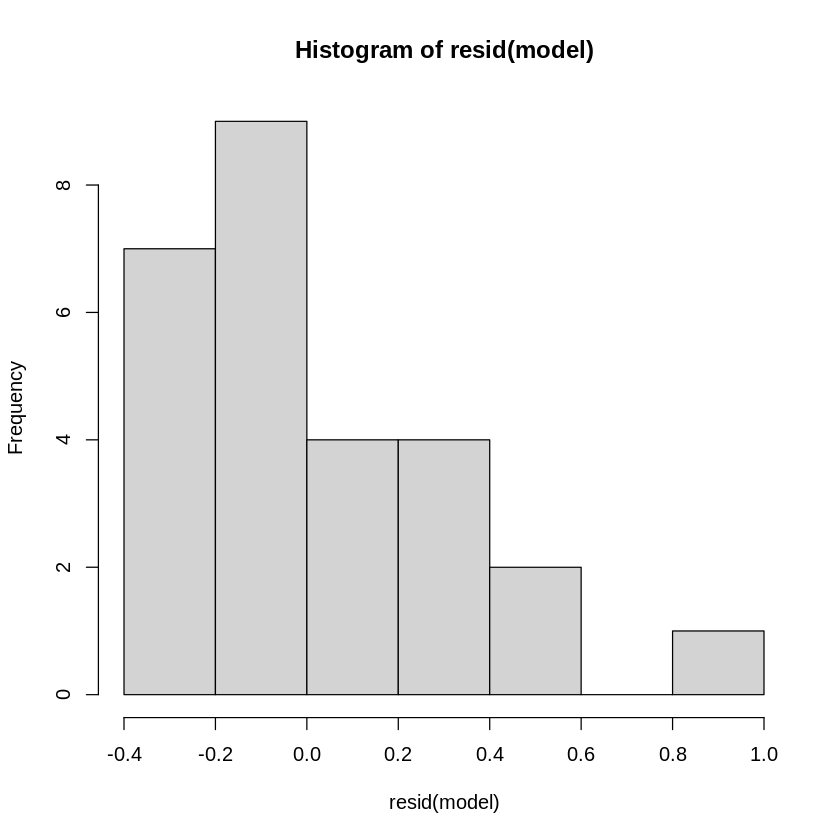

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF DenDF F value  Pr(>F)  
Condition 0.71194 0.35597     2    23  3.7574 0.03872 *
UEFM      0.09620 0.09620     1    23  1.0155 0.32408  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
 contrast                  estimate    SE df t.ratio p.value
 Condition10 - Condition30  -0.0979 0.145 16  -0.675  0.7811
 Condition10 - Condition70   0.2849 0.145 16   1.963  0.1536
 Condition30 - Condition70   0.3828 0.145 16   2.638  0.0447

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey method for comparing a family of 3 estimates 
 Condition emmean    SE   df null t.ratio p.value
 10         1.028 0.103 22.9    1   0.269  0.7906
 30         1.126 0.103 22.9    1   1.223  0.2336
 70         0.743 0.103 22.9    1  -2.508  0.0197

Degrees-of-freedom method: kenward-roger 


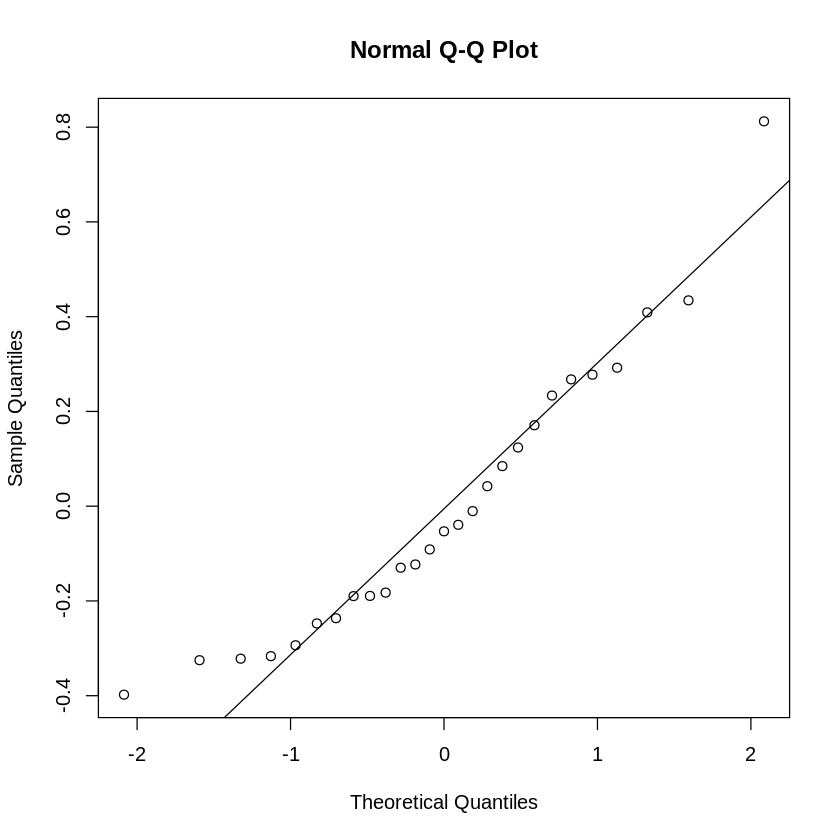

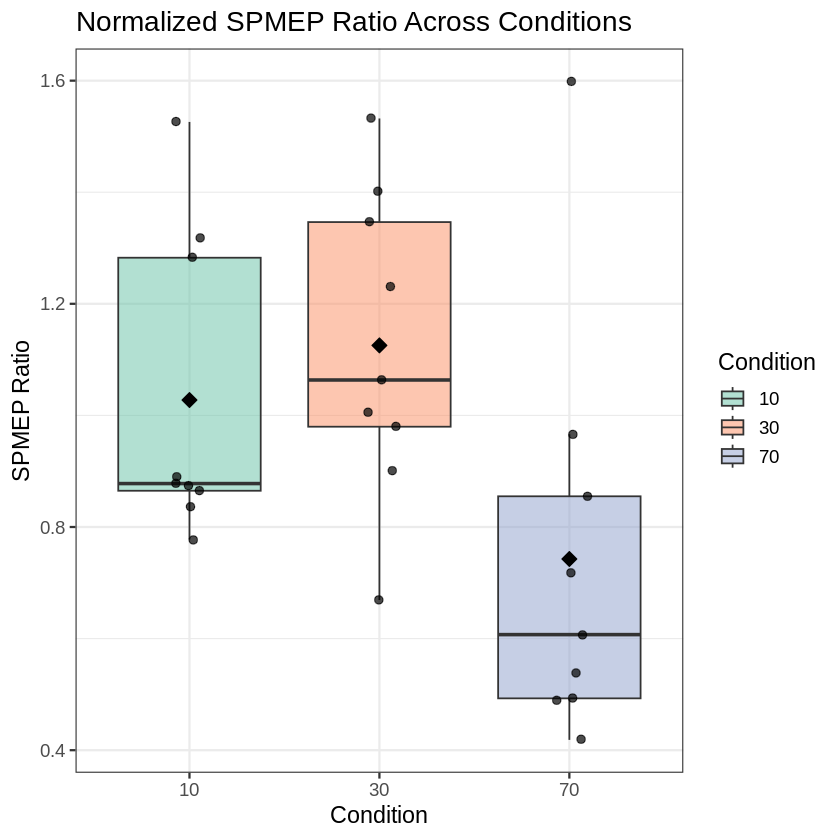

In [24]:
# ===============================================================
# PART 5: INTRACORTICAL INHIBITION (CSP)
# ===============================================================

# Load CSP data
data <- read.csv("R_Data_4_ICI.csv") %>%
  filter(Condition %in% c("10","30","70")) %>%
  filter(!SubID %in% c("A016","A073","A017","A074")) %>%
  mutate(SubID=factor(SubID), Condition=factor(Condition,levels=c("10","30","70")))

included_subjects <- unique(data$SubID)
cat("N=", length(included_subjects), "\n"); print(included_subjects)

# Mixed model for CSPRatio
model <- lmer(CSPRatio ~ Condition + UEFM + (1|SubID), data=data)
shapiro.test(resid(model))
hist(resid(model))
qqnorm(resid(model)); qqline(resid(model))
print(anova(model))

# Post-hoc comparisons for CSP
print(summary(contrast(emmeans(model, ~ Condition), method="pairwise", adjust="Tukey")))
print(test(emmeans(model, ~ Condition), null=1.0))

# Visualization
p_dyn <- ggplot(data, aes(x = Condition, y = CSPRatio)) +
  geom_boxplot(aes(fill = Condition), alpha = 0.5, outlier.shape = NA) +
  geom_point(position = position_jitter(width = 0.1), size = 2, alpha = 0.7) +
  geom_point(stat = "summary", fun = mean, shape = 23, size = 3, fill = "black") +
  scale_fill_brewer(palette = "Set2") +
  theme_bw(base_size = 14) +
  labs(
    title = "Normalized SPMEP Ratio Across Conditions",
    y = "SPMEP Ratio",
    x = "Condition"
  )

print(p_dyn)

N= 9 
[1] A002 A004 A005 A007 A014 A015 A025 A055 A067
Levels: A002 A004 A005 A007 A014 A015 A025 A055 A067
Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq Mean Sq NumDF   DenDF F value    Pr(>F)    
CSPRatio           0.37562 0.37562     1  7.5859 40.3374 0.0002757 ***
Condition          0.04898 0.02449     2 12.0547  2.6301 0.1127514    
UEFM               0.01655 0.01655     1  6.6745  1.7777 0.2261345    
CSPRatio:Condition 0.03622 0.01811     2 10.4848  1.9446 0.1912913    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: MEPRatio ~ CSPRatio * Condition + UEFM + (1 + CSPRatio | SubID)
   Data: data

REML criterion at convergence: -10

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.72762 -0.52351  0.02559  0.60356  1.19846 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 SubID    (Intercept) 

`geom_smooth()` using formula = 'y ~ x'


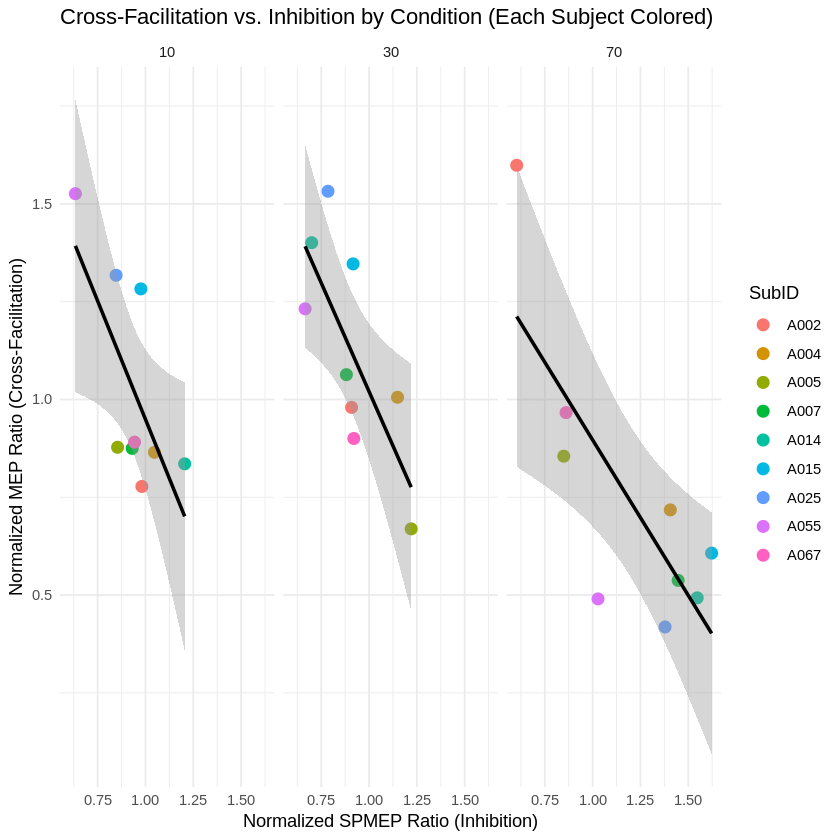

In [26]:
# ===============================================================
# PART 6: ICI vs CF MODEL
# ===============================================================

# Load ICI vs CF dataset
data <- read.csv("R_Data_5_ICIvsCF.csv") %>%
  filter(Condition %in% c("10","30","70"), !SubID %in% c("A016","A073","A017","A074")) %>%
  mutate(SubID=factor(SubID), Condition=factor(Condition,levels=c("10","30","70")))

included_subjects <- unique(data$SubID)
cat("N=", length(included_subjects), "\n"); print(included_subjects)

# Mixed model for MEPRatio by CSPRatio and Condition interaction
model <- lmer(MEPRatio ~ CSPRatio * Condition + UEFM + (1+CSPRatio|SubID), data=data)
print(anova(model)); print(summary(model))

# Visualization
plot_cf_ici = ggplot(data, aes(x = MEPRatio,
                 y = CSPRatio,
                 color = SubID)) +
  geom_point(size = 3) +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  facet_wrap(~Condition) +
  labs(
    x = "Normalized SPMEP Ratio (Inhibition)",
    y = "Normalized MEP Ratio (Cross-Facilitation)",
    title = "Cross-Facilitation vs. Inhibition by Condition (Each Subject Colored)"
  ) +
  theme_minimal()

plot_cf_ici

In [27]:
# ===============================================================
# PART 7: BIMANUAL INTERFERENCE + MEDIATION (FINAL FIXED VERSION)
# ===============================================================

# Load dataset
data_bi <- read.csv("R_Data_6_BI_CF_ICI.csv")
data_bi <- data_bi %>%
  filter(!SubID %in% c("A016", "A073", "A074", "A017"), NPLevel == 70) %>%
  droplevels()

included_subjects <- unique(data_bi$SubID)
cat("N=", length(included_subjects), "\n"); print(included_subjects)

# Outcome model
model1 <- lm(Lag0_High ~ MEPRatio, data = data_bi)
model2 <- lm(Lag0_High ~ MEPRatio + CSPRatio, data = data_bi)

# ANOVA output for both models
anova(model1)
anova(model2)

# Create mediation model components
model.M <- lm(MEPRatio ~ CSPRatio, data = data_bi)
model.Y <- lm(Lag0_High ~ MEPRatio + CSPRatio, data = data_bi)

# First mediation (seed 1500)
set.seed(1500)
med.out1 <- mediate(model.m = model.M, model.y = model.Y,
                    treat = "CSPRatio", mediator = "MEPRatio",
                    boot = TRUE, sims = 5000)
summary(med.out1)

# Second mediation (seed 2000)
set.seed(2000)
med.out2 <- mediate(model.m = model.M, model.y = model.Y,
                    treat = "CSPRatio", mediator = "MEPRatio",
                    boot = TRUE, sims = 5000)
summary(med.out2)

N= 9 
[1] "A002" "A004" "A005" "A007" "A014" "A015" "A025" "A055" "A067"


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
MEPRatio,1,0.1417465,0.14174647,5.321092,0.05444694
Residuals,7,0.1864703,0.02663861,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
MEPRatio,1,0.14174647,0.14174647,5.747581,0.0534832
CSPRatio,1,0.03849864,0.03849864,1.561055,0.2580407
Residuals,6,0.14797161,0.02466193,NA,NA


Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

                  Estimate 95% CI Lower 95% CI Upper p-value  
ACME           -0.46898851  -1.32589902  -0.00064462  0.0492 *
ADE             0.30291238  -0.50308395   0.92262115  0.3760  
Total Effect   -0.16607613  -0.97000254   0.04265003  0.0796 .
Prop. Mediated  2.82393688  -1.14975180  13.55081145  0.0704 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 9 


Simulations: 5000 


Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

                Estimate 95% CI Lower 95% CI Upper p-value  
ACME           -0.468989    -1.351326     0.034632  0.0580 .
ADE             0.302912    -0.487866     0.951705  0.3544  
Total Effect   -0.166076    -0.975808     0.182355  0.0968 .
Prop. Mediated  2.823937    -0.900415    13.744136  0.0740 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 9 


Simulations: 5000 
